# Neural network challenge

In [3]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())


2.9.0+cpu
CUDA available: False


In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"

## Create challenge dataset
DO NOT CHANGE THE CODE THAT CREATES THE DATA SET

See how well you can get the neural network to perform on this data set

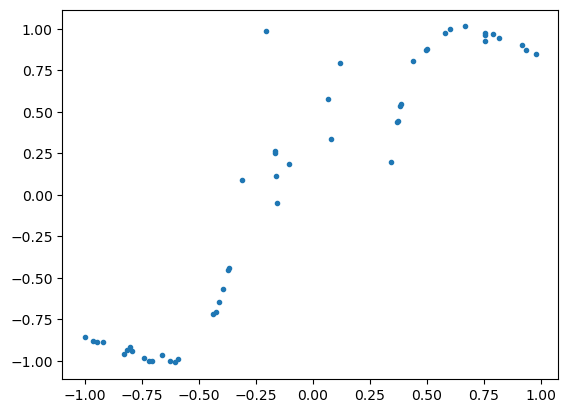

In [5]:
# Define weird function
def weird_fun(x):
    return np.sin(1/x)

# Reset random seed
np.random.seed(1)

# Set data parameters
N = 50 # Number of observations
s = 0.02 # Noise standard deviation
N_test = 1000 # Number of test observations

# Create training set
x_train = np.sort(np.random.rand(N)*2-1)
y_train = weird_fun(x_train) + s*np.random.randn(N)

# Create test set
x_test = np.sort(np.random.rand(N_test)*2-1)
y_test = weird_fun(x_test) + s*np.random.randn(N_test)

# Plot training data
plt.plot(x_train, y_train, '.')

## Train a neural network

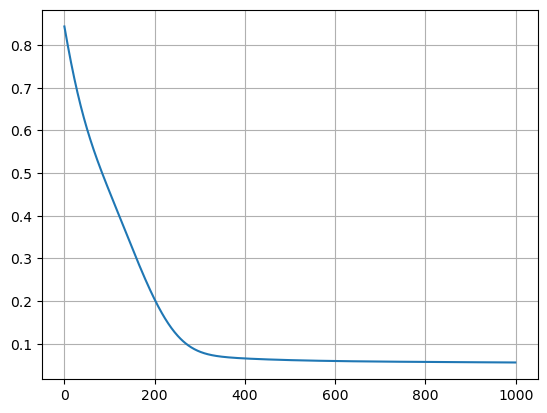

In [6]:
import torch

# H is hidden dimension
H = 5

# Device to use for computations
device = torch.device('cpu')
#device = torch.device('cuda')

# Create Tensors to hold inputs and outputs
x = torch.tensor(np.expand_dims(x_train,1), dtype=torch.float32, device=device)
y = torch.tensor(np.expand_dims(y_train,1), dtype=torch.float32, device=device)

# Manually set random seed
#torch.manual_seed(1)

# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(1, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, H),
    torch.nn.Tanh(),
    torch.nn.Linear(H, 1),
)
model.to(device)
loss_fn = torch.nn.MSELoss(reduction='mean')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use Adam; the optim package contains many other
# optimization algoriths. The first argument to the Adam constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Number of iterations
T = 1000 #An iteration is one complete update step in the training loop
# Allocate space for loss
Loss = np.zeros(T)

for t in range(T):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(x)

    # Compute and save loss.
    loss = loss_fn(y_pred, y)
    Loss[t] = loss.item()

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()    

plt.plot(Loss)
plt.grid(True)

### Plot the fit and display error

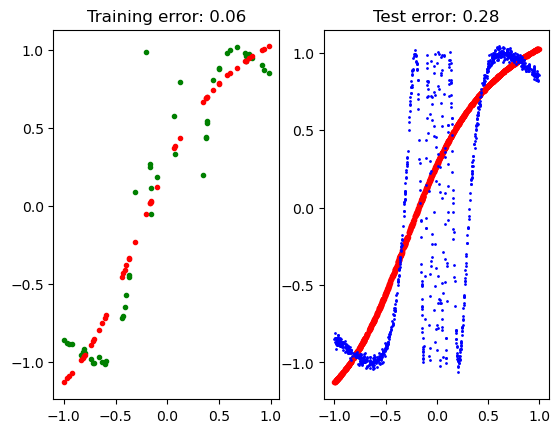

In [7]:
# Plot training data and fit
plt.subplot(121)
plt.plot(x_train, y_train, 'g.');
plt.plot(x_train, y_pred.cpu().detach().numpy(), 'r.')
train_error = loss_fn(y_pred, y).item()
plt.title('Training error: {:.2f}'.format(train_error))
# Plot test data and fit
x_t = torch.tensor(np.expand_dims(x_test,1), dtype=torch.float32, device=device)
y_t = torch.tensor(np.expand_dims(y_test,1), dtype=torch.float32, device=device)
y_t_pred = model(x_t)
x_all = np.linspace(-1,1,1000)
x_all_t = torch.tensor(np.expand_dims(x_all,1), dtype=torch.float32, device=device)
y_all_t = model(x_all_t)
plt.subplot(122)
plt.plot(x_all, y_all_t.cpu().detach().numpy(), 'r-');
plt.plot(x_test, y_t_pred.cpu().detach().numpy(), 'r.')
plt.plot(x_test, y_test, 'b.', markersize=2);
test_error = loss_fn(y_t_pred, y_t).item()
plt.title('Test error: {:.2f}'.format(test_error));
#red is prediction and green is the true data
#The training error measures how well your model fits the data it was trained on.
#The test error measures how well your model generalizes to unseen data — data it has never seen before.

## Exercise

$\star$ Experiment with 
- the number of hidden units
- the number of layers
- the type of non-linearity
- the number of iterations
- the learning rate

and see how low you can get the test error

$\star$ **Challenge**: Can you make the neural network so complex (by adding more hidden units/hidden layers) that it overfits to the training data? Can you bring the training error to zero?